
# JAYDEEP DIXIT

## The Sparks Foundation Task 2 - Unsupervised Machine Learning 

In this task we will predict the optimum number of clusters in the Iris dataset and represent it visually

### Importing all the required Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

### Load the data and display the first 5 rows 

In [78]:
df=pd.read_csv("D:\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Check if null values are present the Dataset

In [79]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [80]:
# Drop the "Id" column as it is not needed 
df=df.drop("Id",axis=1)

In [81]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### let's plot a pairplot to gain more insights from the data 

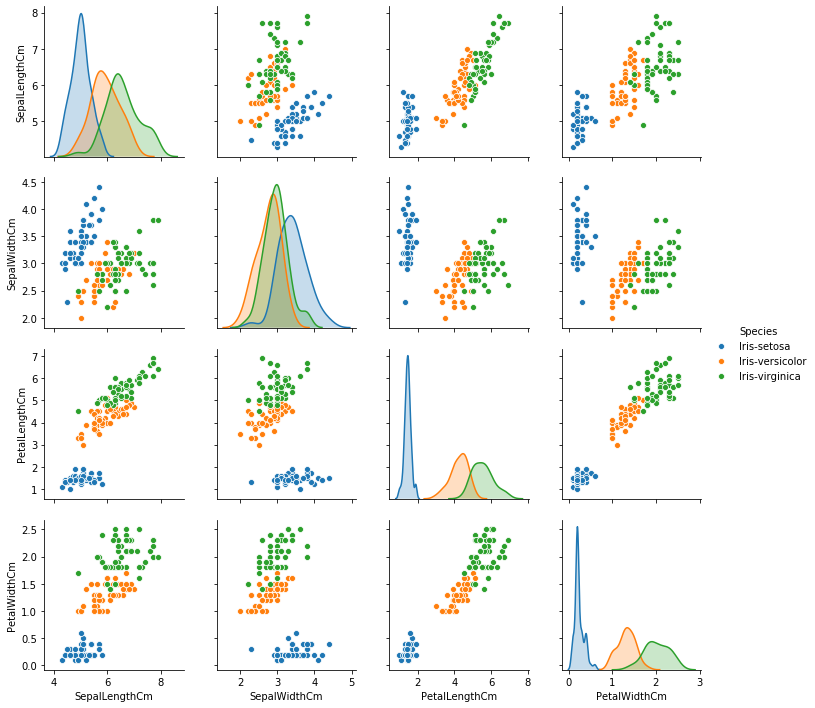

In [82]:
sns.pairplot(df,hue="Species")

In [83]:
# drop the species column as it is not required for clustering.
X=df.drop(["Species"],axis=1)

In [84]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### With the help of Elbow method lets find the optimum value of clusters

Text(0, 0.5, 'wcss')

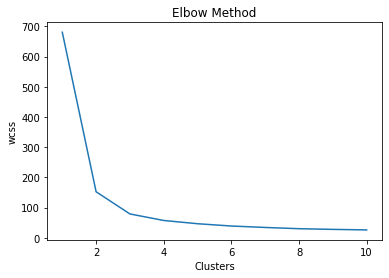

In [85]:
X=df.iloc[:,[0,1,2,3]].values
wcss=[] #Within-Cluster-Sum-of-Squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0) # k-means++ is used to avoid random initialization trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans_inertia returns the wcss value for an initialized cluster 
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("wcss")

### From the above graph we can observe and take optimum k value as 3

### Let's train the algorithm

In [63]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [64]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the Clusters

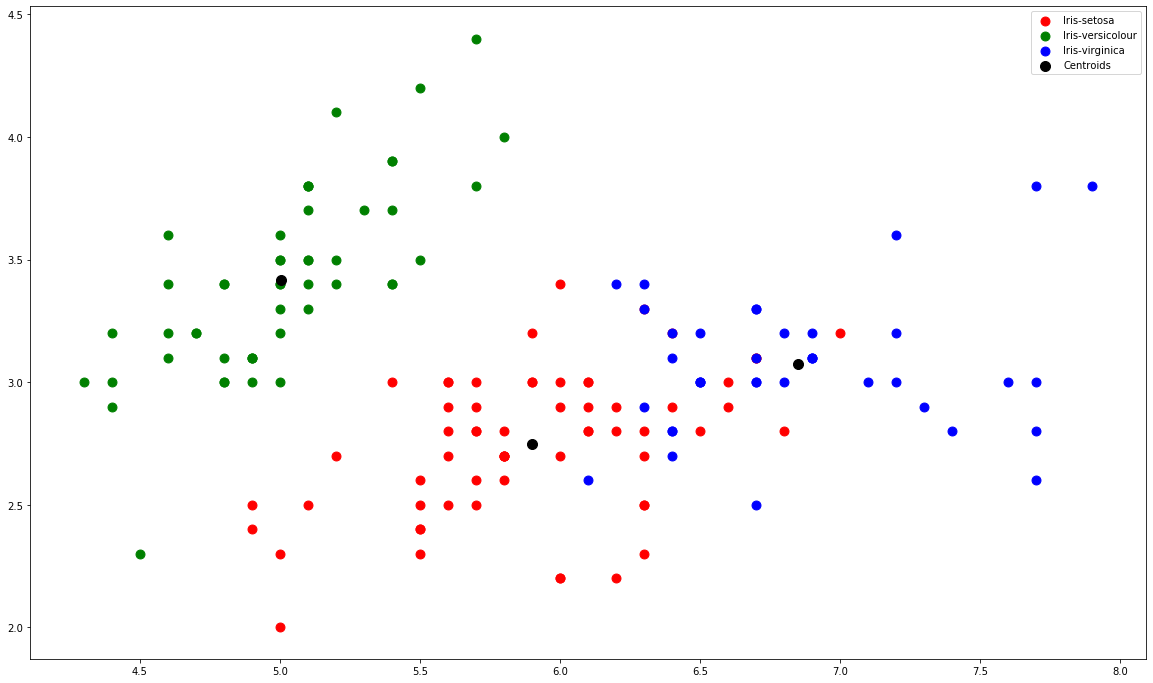

In [68]:
plt.figure(figsize=(20,12))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='green',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='blue',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.legend();